<a href="https://colab.research.google.com/github/peeyush91099/Major-Project/blob/main/pandemic_crisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/owid-covid-data (1).csv')
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74861,ZWE,Africa,Zimbabwe,2021-03-10,36341.0,20.0,23.143,1489.0,0.0,1.571,2445.077,1.346,1.557,100.182,0.000,0.106,0.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2164.0,399018.0,26.847,0.146,1672.0,0.112,0.014,72.2,tests performed,35901.0,35901.0,NaN,140.0,1133.0,0.24,0.24,NaN,76.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
74862,ZWE,Africa,Zimbabwe,2021-03-11,36377.0,36.0,22.000,1492.0,3.0,1.286,2447.499,2.422,1.480,100.384,0.202,0.087,0.74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1706.0,400724.0,26.961,0.115,1623.0,0.109,0.014,73.8,tests performed,36019.0,36019.0,NaN,118.0,766.0,0.24,0.24,NaN,52.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
74863,ZWE,Africa,Zimbabwe,2021-03-12,36423.0,46.0,25.000,1496.0,4.0,1.714,2450.594,3.095,1.682,100.653,0.269,0.115,0.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2109.0,402833.0,27.103,0.142,1705.0,0.115,0.015,68.2,tests performed,36283.0,36283.0,NaN,264.0,708.0,0.24,0.24,NaN,48.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
74864,ZWE,Africa,Zimbabwe,2021

In [19]:
df['location'].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Asia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Europe', 'European Union', 'Faeroe Islands', 'Falkland Islands',
       'Fiji', 'Finland', 'Fran

In [20]:
df_ind = df[df['location'] == 'India']
df_ind

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
30761,IND,Asia,India,2020-01-30,1.0,1.0,NaN,NaN,NaN,NaN,0.001,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
30762,IND,Asia,India,2020-01-31,1.0,0.0,NaN,NaN,NaN,NaN,0.001,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
30763,IND,Asia,India,2020-02-01,1.0,0.0,NaN,NaN,NaN,NaN,0.001,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
30764,IND,Asia,India,2020-02-02,2.0,1.0,NaN,NaN,NaN,NaN,0.001,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
30765,IND,Asia,India,2020-02-03,3.0,1.0,NaN,NaN,NaN,NaN,0.002,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31166,IND,Asia,India,2021-03-10,11285561.0,22854.0,18376.857,158189.0,126.0,107.714,8177.917,16.561,13.317,114.629,0.091,0.078,1.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,763081.0,223479877.0,161.941,0.553,725229.0,0.526,0.025,39.5,samples tested,25685011.0,21034481.0,4650530.0,1317105.0,1295566.0,1.86,1.52,0.34,939.0,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
31167,IND,Asia,India,2021-03-11,11308846.0,23285.0,19297.857,158306.0,117.0,108.286,8194.790,16.873,13.984,114.714,0.085,0.078,1.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,778416.0,224258293.0,162.505,0.564,725626.0,0.526,0.027,37.6,samples tested,26164920.0,21435841.0,4729079.0,479909.0,1165631.0,1.90,1.55,0.34,845.0,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
31168,IND,Asia,India,2021-03-12,11333728.0,24882.0,20240.429,158446.0,140.0,112.857,8212.820,18.030,14.667,114.816,0.101,0.082,1.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,740345.0,224998638.0,163.042,0.536,722557.0,0.524,0.028,35.7,samples tested,28218457.0,23075504.0,5142953.0,2053537.0,1245822.0,2.

In [21]:
df_ind.rename(columns = {'new_cases' : 'y','date':'ds'},inplace = True)
df_ind



/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,iso_code,continent,location,ds,total_cases,y,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
30761,IND,Asia,India,2020-01-30,1.0,1.0,NaN,NaN,NaN,NaN,0.001,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
30762,IND,Asia,India,2020-01-31,1.0,0.0,NaN,NaN,NaN,NaN,0.001,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
30763,IND,Asia,India,2020-02-01,1.0,0.0,NaN,NaN,NaN,NaN,0.001,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
30764,IND,Asia,India,2020-02-02,2.0,1.0,NaN,NaN,NaN,NaN,0.001,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
30765,IND,Asia,India,2020-02-03,3.0,1.0,NaN,NaN,NaN,NaN,0.002,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31166,IND,Asia,India,2021-03-10,11285561.0,22854.0,18376.857,158189.0,126.0,107.714,8177.917,16.561,13.317,114.629,0.091,0.078,1.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,763081.0,223479877.0,161.941,0.553,725229.0,0.526,0.025,39.5,samples tested,25685011.0,21034481.0,4650530.0,1317105.0,1295566.0,1.86,1.52,0.34,939.0,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
31167,IND,Asia,India,2021-03-11,11308846.0,23285.0,19297.857,158306.0,117.0,108.286,8194.790,16.873,13.984,114.714,0.085,0.078,1.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,778416.0,224258293.0,162.505,0.564,725626.0,0.526,0.027,37.6,samples tested,26164920.0,21435841.0,4729079.0,479909.0,1165631.0,1.90,1.55,0.34,845.0,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
31168,IND,Asia,India,2021-03-12,11333728.0,24882.0,20240.429,158446.0,140.0,112.857,8212.820,18.030,14.667,114.816,0.101,0.082,1.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,740345.0,224998638.0,163.042,0.536,722557.0,0.524,0.028,35.7,samples tested,28218457.0,23075504.0,5142953.0,2053537.0,1245822.0,2.04,1.67,0.

In [22]:
df_new = df_ind[['ds','y']]
df_new

,ds,y
30761,2020-01-30,1.0
30762,2020-01-31,0.0
30763,2020-02-01,0.0
30764,2020-02-02,1.0
30765,2020-02-03,1.0
...,...,...
31166,2021-03-10,22854.0
31167,2021-03-11,23285.0
31168,2021-03-12,24882.0
31169,2021-03-13,25320.0


In [23]:
df_new['ds'] = pd.to_datetime(df_new['ds'])
df_new['y'] = df_new['y'].astype(int)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 410 entries, 30761 to 31170
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      410 non-null    datetime64[ns]
 1   y       410 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 9.6 KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [25]:
df_new['y'] = sc.fit_transform(df_new['y'].values.reshape(-1,1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



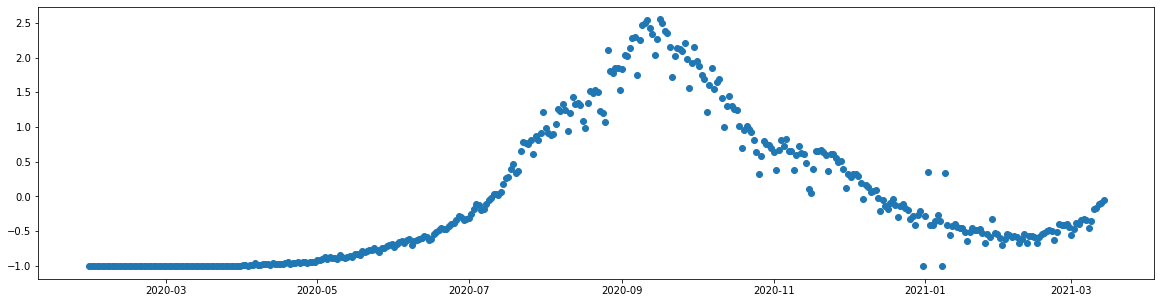

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.scatter(df_new['ds'],df_new['y'])
plt.show()

In [27]:
import fbprophet

op = fbprophet.Prophet(changepoint_prior_scale=1)
op.fit(df_new)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [28]:
forecast = op.make_future_dataframe(periods = 365,freq = 'D')
forecast = op.predict(forecast)

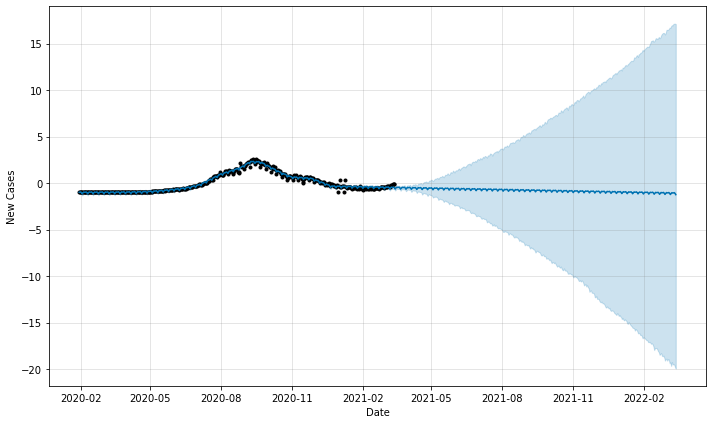

In [29]:
op.plot(forecast,xlabel = 'Date',ylabel='New Cases');

In [30]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-30,-1.018939,-1.166923,-0.826324,-1.018939,-1.018939,0.026487,0.026487,0.026487,0.026487,0.026487,0.026487,0.0,0.0,0.0,-0.992452
1,2020-01-31,-1.018630,-1.140872,-0.802041,-1.018630,-1.018630,0.035572,0.035572,0.035572,0.035572,0.035572,0.035572,0.0,0.0,0.0,-0.983058
2,2020-02-01,-1.018321,-1.113732,-0.787883,-1.018321,-1.018321,0.066376,0.066376,0.066376,0.066376,0.066376,0.066376,0.0,0.0,0.0,-0.951945
3,2020-02-02,-1.018011,-1.194252,-0.858662,-1.018011,-1.018011,-0.008322,-0.008322,-0.008322,-0.008322,-0.008322,-0.008322,0.0,0.0,0.0,-1.026333
4,2020-02-03,-1.017702,-1.335318,-0.981975,-1.017702,-1.017702,-0.147122,-0.147122,-0.147122,-0.147122,-0.147122,-0.147122,0.0,0.0,0.0,-1.164824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
770,2022-03-10,-1.090760,-19.498712,16.943404,-19.422687,16.966541,0.026487,0.026487,0.026487,0.026487,0.026487,0.026487,0.0,0.0,0.0,-1.064273
771,2022-03-11,-1.092414,-19.471615,17.120398,-19.531068,17.049666,0.035572,0.035572,0.035572,0.035572,0.035572,0.035572,0.0,0.0,0.0,-1.056842
772,2022-03-12,-1.094068,-19.524823,17.129092,-19.639450,17.149129,0.066376,0.066376,0.066376,0.066376,0.066376,0.066376,0.0,0.0,0.0,-1.027692
773,2022-03-13,-1.095721,-19.766103,17.138029,-19.745288,17.224234,-0.008322,-0.008322,-0.008322,-0.008322,-0.008322,-0.008322,0.0,0.0,0.0,-1.104043


In [33]:
forecast['new_cases'] = sc.inverse_transform(forecast['yhat'].values.reshape(-1,1))

In [34]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,new_cases
0,2020-01-30,-1.018939,-1.166923,-0.826324,-1.018939,-1.018939,0.026487,0.026487,0.026487,0.026487,0.026487,0.026487,0.0,0.0,0.0,-0.992452,479.518841
1,2020-01-31,-1.018630,-1.140872,-0.802041,-1.018630,-1.018630,0.035572,0.035572,0.035572,0.035572,0.035572,0.035572,0.0,0.0,0.0,-0.983058,737.832260
2,2020-02-01,-1.018321,-1.113732,-0.787883,-1.018321,-1.018321,0.066376,0.066376,0.066376,0.066376,0.066376,0.066376,0.0,0.0,0.0,-0.951945,1593.352645
3,2020-02-02,-1.018011,-1.194252,-0.858662,-1.018011,-1.018011,-0.008322,-0.008322,-0.008322,-0.008322,-0.008322,-0.008322,0.0,0.0,0.0,-1.026333,-452.104991
4,2020-02-03,-1.017702,-1.335318,-0.981975,-1.017702,-1.017702,-0.147122,-0.147122,-0.147122,-0.147122,-0.147122,-0.147122,0.0,0.0,0.0,-1.164824,-4260.213488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
770,2022-03-10,-1.090760,-19.498712,16.943404,-19.422687,16.966541,0.026487,0.026487,0.026487,0.026487,0.026487,0.026487,0.0,0.0,0.0,-1.064273,-1495.351545
771,2022-03-11,-1.092414,-19.471615,17.120398,-19.531068,17.049666,0.035572,0.035572,0.035572,0.035572,0.035572,0.035572,0.0,0.0,0.0,-1.056842,-1291.016666
772,2022-03-12,-1.094068,-19.524823,17.129092,-19.639450,17.149129,0.066376,0.066376,0.066376,0.066376,0.066376,0.066376,0.0,0.0,0.0,-1.027692,-489.474821
773,2022-03-13,-1.095721,-19.766103,17.138029,-19.745288,17.224234,-0.008322,-0.008322,-0.008322,-0.008322,-0.008322,-0.008322,0.0,0.0,0.0,-1.104043,-2588.910999
